<a href="https://colab.research.google.com/github/mansine/Comparison-of-statistical-techniques/blob/main/Main%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Define the libraries and imports
# Panda
import pandas as pd
#mat plot
import matplotlib.pyplot as plt
#Sea born
import seaborn as sns
#Num py
import numpy as np
#Sk learn imports
from sklearn import tree,preprocessing
#ensembles
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import sklearn.metrics as metrics
#scores
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc  
#models
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,learning_curve,GridSearchCV,validation_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#export the model
import pickle
import os
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# Data Pre- Processing

In [ ]:
Fifa= pd.read_csv("/content/data.csv")

SyntaxError: ignored

In [ ]:
#check the missing value
Fifa.isnull().sum()


Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
# drop redundant columns
Fifa.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
#Filling the Missing Values Using Mean, Mode, and Median
#Imputing Club and Position
Fifa['Club'].fillna('No Club', inplace = True)
Fifa['Position'].fillna('ST', inplace = True)
impute_by_mean = Fifa.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]
for i in impute_by_mean.columns:
    Fifa[i].fillna(Fifa[i].mean(), inplace = True)                                 
### These are categorical variables and will be imputed by mode.
impute_by_mode = Fifa.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in impute_by_mode.columns:
    Fifa[i].fillna(Fifa[i].mode()[0], inplace = True)
### The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
impute_by_median = Fifa.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in impute_by_median.columns:
    Fifa[i].fillna(Fifa[i].median(), inplace = True)
Fifa.fillna(0, inplace = True)
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Points per game', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


# Visualisation

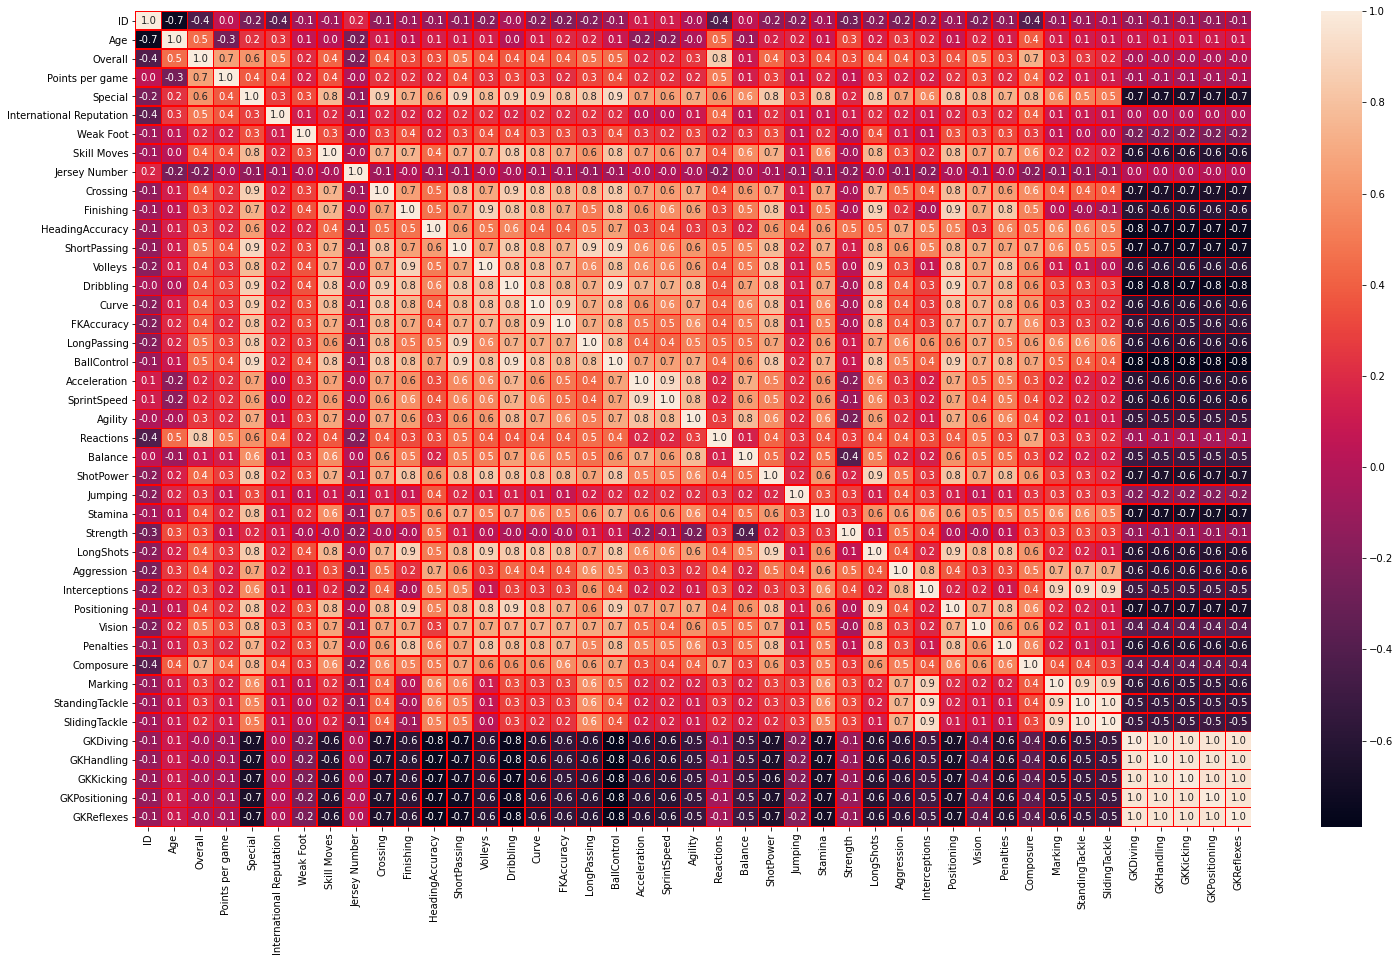

In [ ]:
#Correlation between different features

f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(Fifa.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

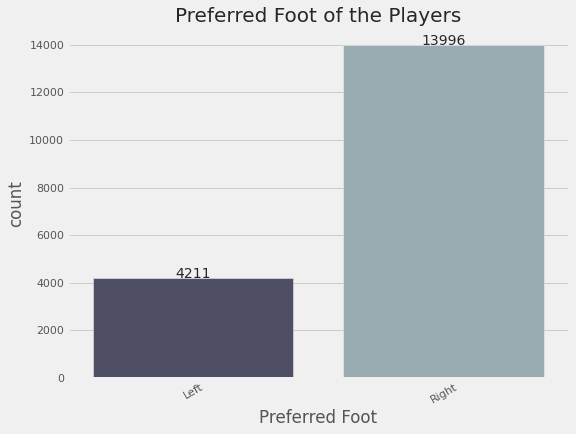

In [ ]:
Fifa['Preferred Foot'].value_counts()/len(Fifa)
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=Fifa['Preferred Foot'], data=Fifa, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
#Analyze players based on nationality
Fifa['Nationality'].unique()


array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [ ]:
top_country = Fifa['Nationality'].value_counts().head(15)

top_country

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
Name: Nationality, dtype: int64

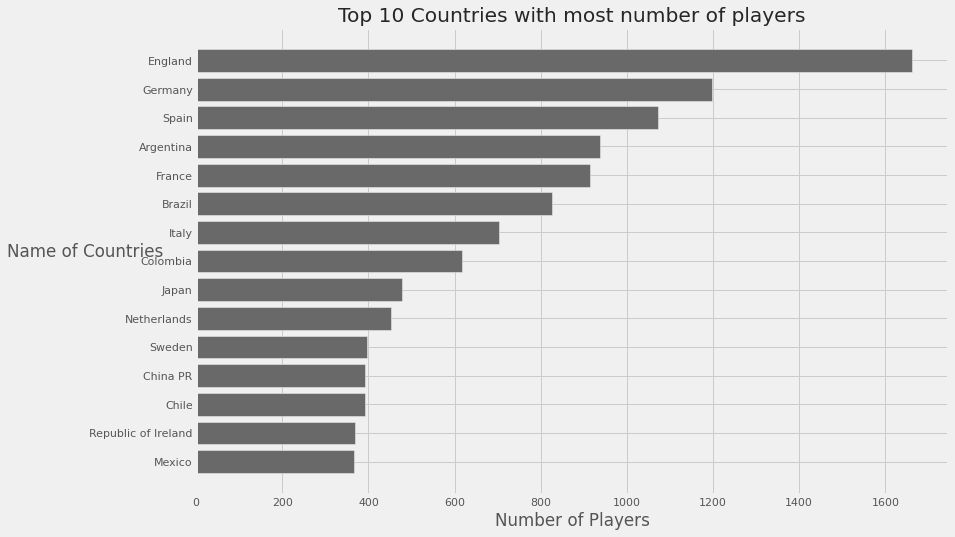

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_country.values
y = top_country.index
ax.barh(y, x, align='center', color='dimgray')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

In [ ]:
# best players per each position with their age, club, and nationality based on their overall scores

Fifa.iloc[Fifa.groupby(Fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


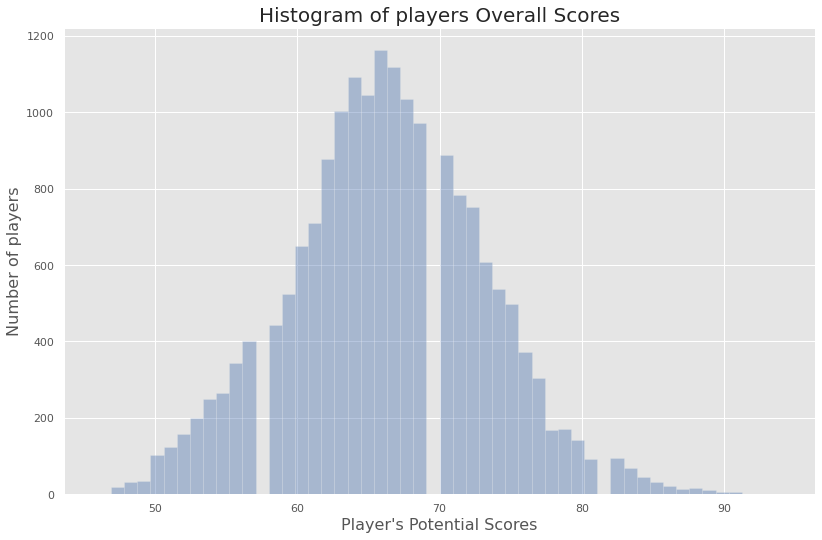

In [ ]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = Fifa.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'b')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

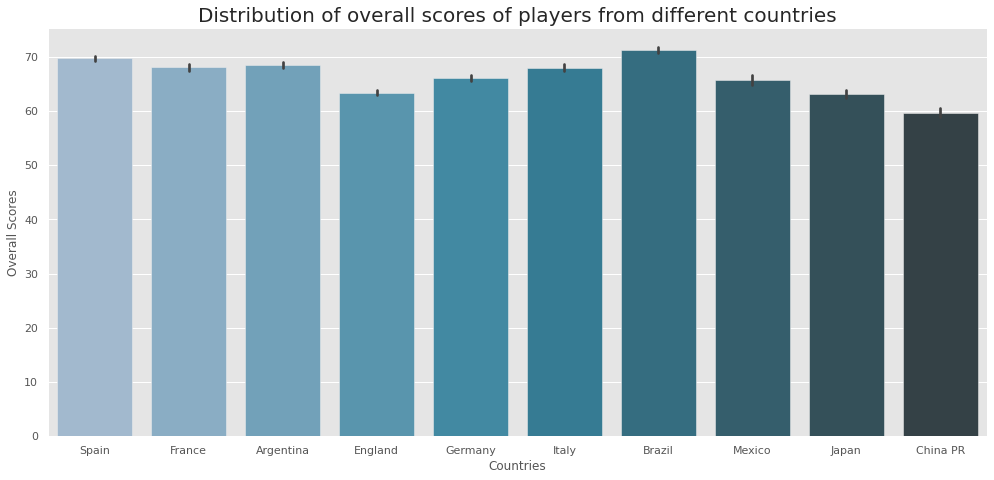

In [ ]:
# Every Nations' Player and their overall scores

countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'Japan', 'Mexico', 'China PR')
data_country= Fifa.loc[Fifa['Nationality'].isin(countries) & Fifa['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['Nationality'], y = data_country['Overall'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 12)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

In [ ]:
#Dropping unnecessary values 
drop_cols = Fifa.columns[28:54]
Fifa = Fifa.drop(drop_cols, axis = 1)
Fifa = Fifa.drop(['ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
Fifa = Fifa.dropna()
Fifa.head()

,Age,Nationality,Overall,Points per game,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,LS,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,88+2,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,91+3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,84+3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,82+3,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
#Converting Preferred foot record to values
def foot(Fifa):
    if(Fifa['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
#Converting Real Face into values
def face_to_num(Fifa):
    if(Fifa['Real Face'] == 'Yes'):
        return 1
    else:
        return 0

In [ ]:
#Creating a simplified position variable by combining diff positions
def simple_position(Fifa):
    if (Fifa['Position'] == 'GK'):
        return 'GK'
    elif ((Fifa['Position'] == 'RB') or (Fifa['Position'] == 'LB') or (Fifa['Position'] == 'CB') or (Fifa['Position'] == 'LCB') or (Fifa['Position'] == 'RCB') or (Fifa['Position'] == 'RWB') or (Fifa['Position'] == 'LWB')):
        return 'DF'
    elif ((Fifa['Position'] == 'LDM') or (Fifa['Position'] == 'CDM') or (Fifa['Position'] == 'RDM')):
        return 'DM'
    elif ((Fifa['Position'] == 'LM') or (Fifa['Position'] == 'LCM') or (Fifa['Position'] == 'CM') or (Fifa['Position'] == 'RCM') or (Fifa['Position'] == 'RM')):
        return 'MF'
    elif ((Fifa['Position'] == 'LAM') or (Fifa['Position'] == 'CAM') or (Fifa['Position'] == 'RAM') or (Fifa['Position'] == 'LW') or (Fifa['Position'] == 'RW')):
        return 'AM'
    elif ((Fifa['Position'] == 'RS') or (Fifa['Position'] == 'ST') or (Fifa['Position'] == 'LS') or (Fifa['Position'] == 'CF') or (Fifa['Position'] == 'LF') or (Fifa['Position'] == 'RF')):
        return 'ST'
    else:
        return fifa.Position
#Making list of those nations with more then 250 players
nat_count = Fifa.Nationality.value_counts()
nat_list = nat_count[nat_count > 250].index.tolist()

def major_nation(Fifa):
    if(Fifa.Nationality in nat_list):
        return 1
    else:
        return 0

In [ ]:
#Creating a copy to avoid indexing error
fifa1 = Fifa.copy()
#Applying changes to dataset to create new columns
fifa1['Real_Face'] = fifa1.apply(face_to_num, axis = 1)
fifa1['Right_Footed'] = fifa1.apply(foot, axis = 1)
fifa1['Simple_Position'] = fifa1.apply(simple_position, axis = 1)
fifa1['Nation'] = fifa1.apply(major_nation, axis = 1)
#Splitting the Team Work column
tempwork = fifa1['Work Rate'].str.split('/', n = 1, expand = True)

fifa1['Workrate1'] = tempwork[0]
fifa1['Workrate2'] = tempwork[1]

In [ ]:
#Droping the original columns
fifa1 = fifa1.drop(['Work Rate', 'Preferred Foot', 'Real Face', 'Position', 'Nationality'], axis = 1)
fifa1.head()

,Age,Overall,Points per game,International Reputation,Weak Foot,Skill Moves,LS,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Footed,Simple_Position,Nation,Workrate1,Workrate2
0,31,94,94,5.0,4.0,4.0,88+2,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,91+3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,84+3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,82+3,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


# Splitting the data

In [ ]:
#Spliting ID
target = fifa1['Points per game']
fifa2 =fifa1[['Age','Overall','International Reputation','Weak Foot','Skill Moves','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed']]

In [ ]:
#Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fifa2, target, test_size = 0.2, random_state = 0)

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
x_train.values.reshape(-1, 1)
random.fit(x_train, y_train)
y_pred = random.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_pred)))

R2 score: 0.9232655776037607


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0783583157872696
Mean Squared Error: 2.913265356935605
Root Mean Squared Error: 1.7068290356493252


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_pred)))
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score: 0.830215972600649
Mean Absolute Error: 1.999490748225551
Mean Squared Error: 6.445945766417549
Root Mean Squared Error: 2.538886717917432


In [ ]:
import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_pred)))
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[22:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: -15.529078308383124
Mean Absolute Error: 24.703278455152937
Mean Squared Error: 627.535722745576
Root Mean Squared Error: 25.050663119877207


In [ ]:
# make a prediction with an elastic net model on the dataset
from pandas import read_csv
from sklearn.linear_model import ElasticNet
    
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit( x_train, y_train )
y_pred = model.predict(x_test)
print('R2 score: '+str(r2_score(y_test, y_pred)))
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score: 0.8223947219254666
Mean Absolute Error: 2.0487053606285515
Mean Squared Error: 6.742883932215678
Root Mean Squared Error: 2.596706362339739
